# 数据绘图要点4-饼图的问题

本文让我们了解有史以来被批评最多的图表类型：饼图。

## 坏的定义
饼图是一个圆，分为多个部分，每个部分代表整体的一部分。它通常用于显示百分比，其中扇区的总和等于100%。问题是人类在阅读角度方面非常糟糕。在相邻的饼图中，尝试找出最大的一组，并尝试按值对它们进行排序，对于人类而言是很难的，这就是必须避免使用饼图的原因。让我们尝试比较3个饼图。尝试了解在这3个图形中哪个组的值最高。此外，尝试弄清楚群体之间的价值演变是什么。

In [6]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(patchwork)

# create 3 data frame 创建数据
data1 <- data.frame( name=letters[1:5], value=c(17,18,20,22,24) )
data2 <- data.frame( name=letters[1:5], value=c(20,18,21,20,20) )
data3 <- data.frame( name=letters[1:5], value=c(24,23,21,19,18) )
# 查看数据
data1
data2
data3

name,value
<fct>,<dbl>
a,17
b,18
c,20
d,22
e,24


name,value
<fct>,<dbl>
a,20
b,18
c,21
d,20
e,20


name,value
<fct>,<dbl>
a,24
b,23
c,21
d,19
e,18


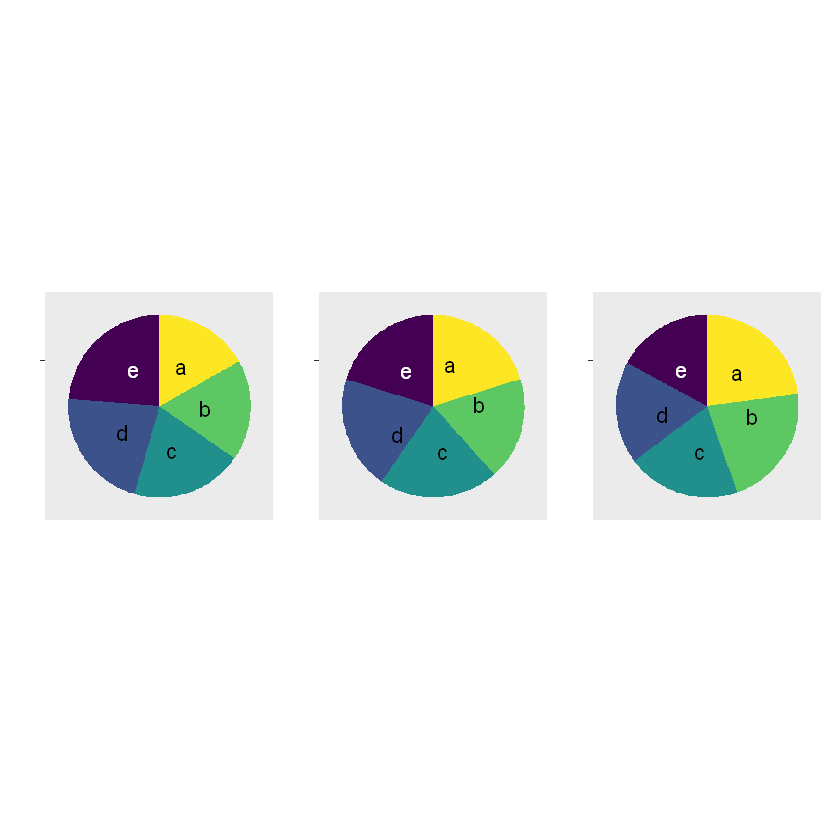

In [7]:
# 定义绘图函数
plot_pie <- function(data, vec){

ggplot(data, aes(x="name", y=value, fill=name)) +
  # 饼图要先绘制条形图
  geom_bar(width = 1, stat = "identity") +
  # 改为极坐标系
  coord_polar("y", start=0, direction = -1) +
  # 设置填充颜色
  scale_fill_viridis(discrete = TRUE,  direction=-1) + 
  # 显示文字  
  geom_text(aes(y = vec, label = rev(name), size=4, color=c( "white", rep("black", 4)))) +
  scale_color_manual(values=c("black", "white")) +
  theme(
    legend.position="none",
    plot.title = element_text(size=14),
    panel.grid = element_blank(),
    axis.text = element_blank()
  ) +
  xlab("") +
  ylab("")
}

a <- plot_pie(data1, c(10,35,55,75,93))
b <- plot_pie(data2, c(10,35,53,75,93))
c <- plot_pie(data3, c(10,29,50,75,93))
a + b + c

现在，让我们使用条形图barplot表示完全相同的数据：

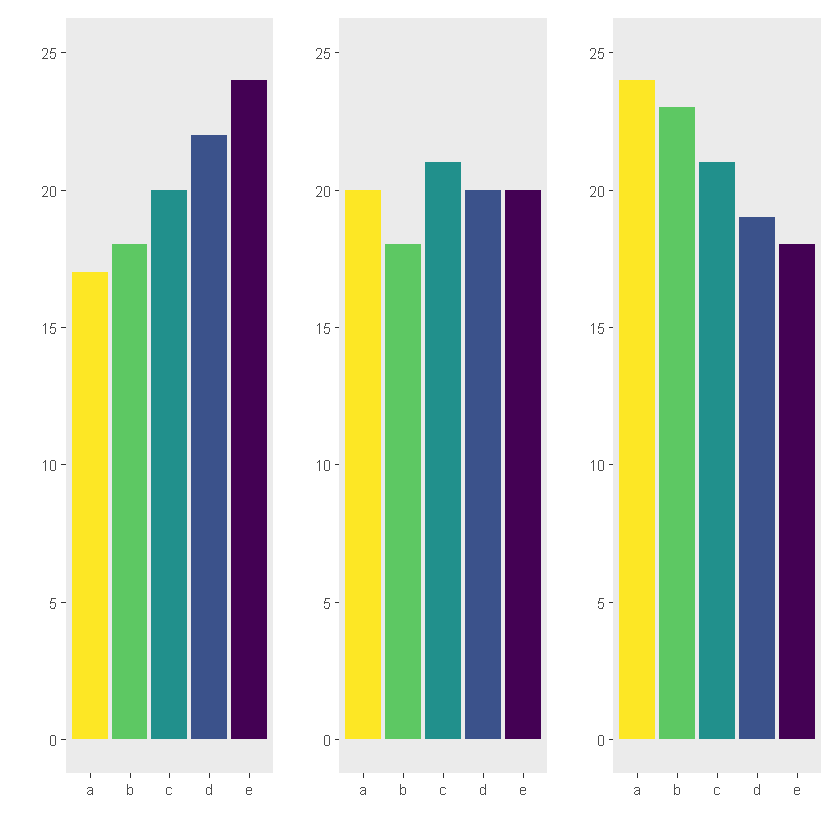

In [8]:
# 定义绘图函数
plot_bar  <- function(data){

ggplot(data, aes(x=name, y=value, fill=name)) +
  # 绘制条形图
  geom_bar(stat = "identity") +
  # 设置填充颜色
  scale_fill_viridis(discrete = TRUE,  direction=-1) + 
  scale_color_manual(values=c("black", "white")) +
  theme(
    legend.position="none",
    plot.title = element_text(size=14),
    panel.grid = element_blank(),
  ) +
  ylim(0,25) +
  xlab("") +
  ylab("")

}

a <- plot_bar (data1)
b <- plot_bar (data2)
c <- plot_bar (data3)
a + b + c

让我们谈谈使用图表的原因。 
+ 图表是获取信息并使其更易于理解的一种方式。
+ 一般来说，图表的目的是更容易比较不同的数据集。
+ 图表能够在不增加复杂性的情况下传达越多越好的信息。

正如您通过对比图片可以看到，饼图难以直观表现数据间的差异，而条形图正好相反，可以清晰看到不同数据的差别。饼图没法比较各种不同的值，而且也没法传达更多的信息。

# 解决方案

条形图，柱状图是饼图的最佳替代品。如果你有很多值要显示，你也可以考虑一个在我看来更优雅一点的棒棒糖图。以下是基于世界上少数国家/地区销售的重要物品数量的展示示例：

[1] 38

,Country,Value
,<fct>,<int>
1,United States,12394
2,Russia,6148
3,Germany (FRG),1653
4,France,2162
5,United Kingdom,1214
6,China,1131


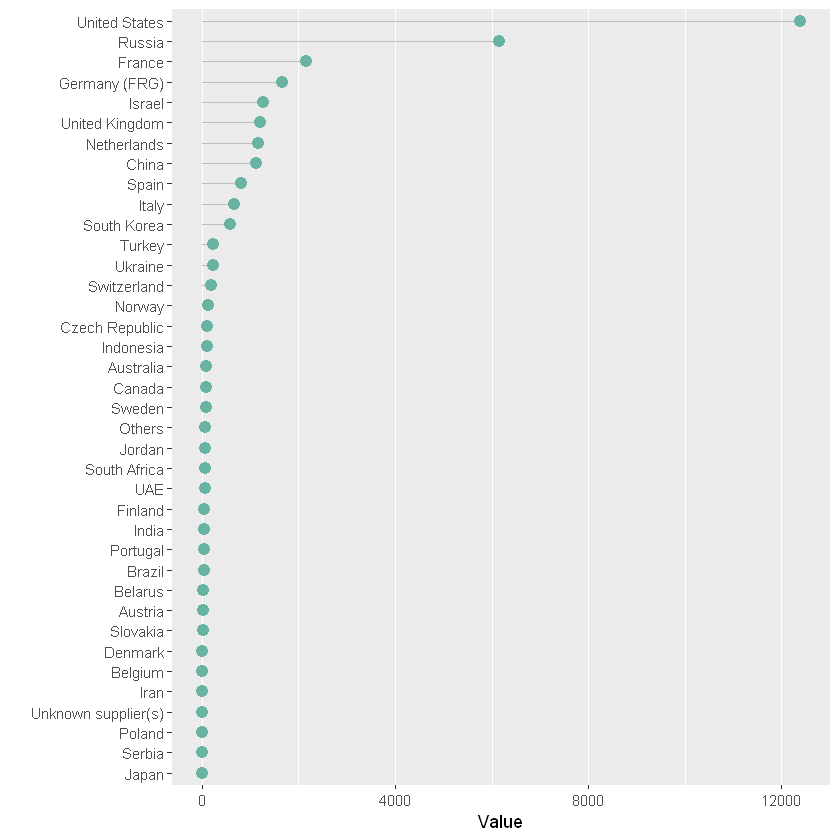

In [9]:
# 从github加载数据
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv", header=TRUE, sep=",")
# 清除空值数据
data <- filter(data,!is.na(Value))
nrow(data)
head(data)
# 排列数据
data<- arrange(data,Value)
# 将Contry转换为factor项，来表示分类数据
data<- mutate(data,Country=factor(Country, Country))
# 绘图
ggplot(data,aes(x=Country, y=Value) ) +
# 定义数据轴
geom_segment( aes(x=Country ,xend=Country, y=0, yend=Value), color="grey") +
# 绘制点
geom_point(size=3, color="#69b3a2") +
# x,y轴调换
coord_flip() +
# 设置主题
theme(
    # 将内部线条设置为空
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    legend.position="none"
) +
# 原来x轴也就是现在图像中y轴的轴标题设置为空
xlab("")

如果您的目标是描述整体的组成，另一种可能性是创建树状图。

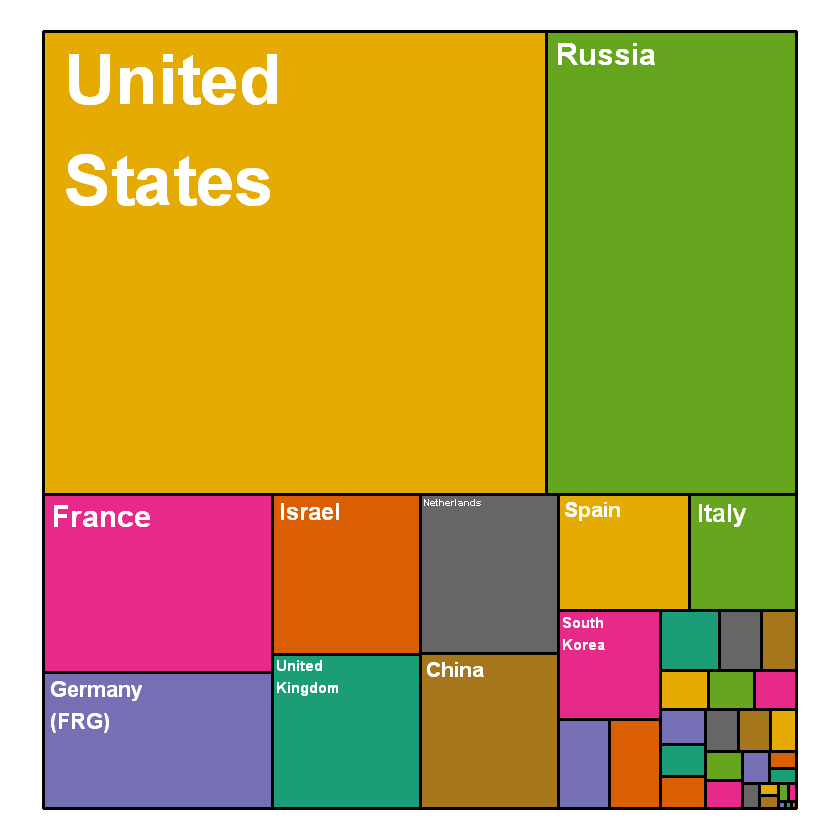

In [10]:
# Package
# 导入专门的包
library(treemap)

# Plot 绘图
treemap(data,    
        # data
        index="Country",
        vSize="Value",
        type="index",

        # 设置颜色
        title="",
        palette="Dark2",

        # Border 边界框设置
        border.col=c("black"),
        # 边界框线宽
        border.lwds=3,                         

        # Labels 设置标签颜色
        fontcolor.labels="white",
        # 设置字体
        fontface.labels=2,
        # 设置标签位置
        align.labels=c("left", "top"),
        # 设置面积越大，标签越大
        inflate.labels=T,
        # 设置显示标签等级，越小显示的标签越少
        fontsize.labels=5
)

# 参考

+ [THE ISSUE WITH PIE CHART](https://www.data-to-viz.com/caveat/pie.html)
+ [pie-charts-are-the-worst](https://www.businessinsider.com.au/pie-charts-are-the-worst-2013-6?r=US&IR=T)